Load the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
matches_df = pd.read_csv('matches.csv')
deliveries_df = pd.read_csv('deliveries.csv')

Explore the basic information of the datasets

In [2]:
print("Matches DataFrame Info:")
print(matches_df.info())

print("\nDeliveries DataFrame Info:")
print(deliveries_df.info())

Matches DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3    

Summary statistics of matches and deliveries DataFrames

In [3]:
print("\nSummary Statistics of Matches DataFrame:")
print(matches_df.describe())

print("\nSummary Statistics of Deliveries DataFrame:")
print(deliveries_df.describe())


Summary Statistics of Matches DataFrame:
                 id       season  dl_applied  win_by_runs  win_by_wickets
count    756.000000   756.000000  756.000000   756.000000      756.000000
mean    1792.178571  2013.444444    0.025132    13.283069        3.350529
std     3464.478148     3.366895    0.156630    23.471144        3.387963
min        1.000000  2008.000000    0.000000     0.000000        0.000000
25%      189.750000  2011.000000    0.000000     0.000000        0.000000
50%      378.500000  2013.000000    0.000000     0.000000        4.000000
75%      567.250000  2016.000000    0.000000    19.000000        6.000000
max    11415.000000  2019.000000    1.000000   146.000000       10.000000

Summary Statistics of Deliveries DataFrame:
           match_id        inning          over          ball  is_super_over  \
count  20736.000000  20736.000000  20736.000000  20736.000000   20736.000000   
mean      44.410831      1.476514     10.058642      3.617332       0.000627   
std    

Check unique values of important columns

In [4]:
print("\nUnique Values in Matches DataFrame:")
print(matches_df.nunique())

print("\nUnique Values in Deliveries DataFrame:")
print(deliveries_df.nunique())


Unique Values in Matches DataFrame:
id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

Unique Values in Deliveries DataFrame:
match_id             89
inning                4
batting_team         11
bowling_team         11
over                 20
ball                  9
batsman             242
non_striker         241
bowler              174
is_super_over         2
wide_runs             5
bye_runs              4
legbye_runs           6
noball_runs           3
penalty_runs          2
batsman_runs          7
extra_runs            6
total_runs            8
player_dismissed    221
dismissal_kind        8
fielder         

Data Cleaning

In [5]:
# Check for missing values in Matches DataFrame
print("\nMissing Values in Matches DataFrame:")
print(matches_df.isnull().sum())

# Check for missing values in Deliveries DataFrame
print("\nMissing Values in Deliveries DataFrame:")
print(deliveries_df.isnull().sum())


Missing Values in Matches DataFrame:
id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Missing Values in Deliveries DataFrame:
match_id                0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    0
batsman                 0
non_striker             0
bowler                  0
is_super_over           0
wide_runs               1
bye_runs                1
legbye_runs             1
noball_runs             1
penalty_runs            1
batsman_runs            1
extra_runs              1
total_runs              1
player_dismissed    19672


Data Visualization

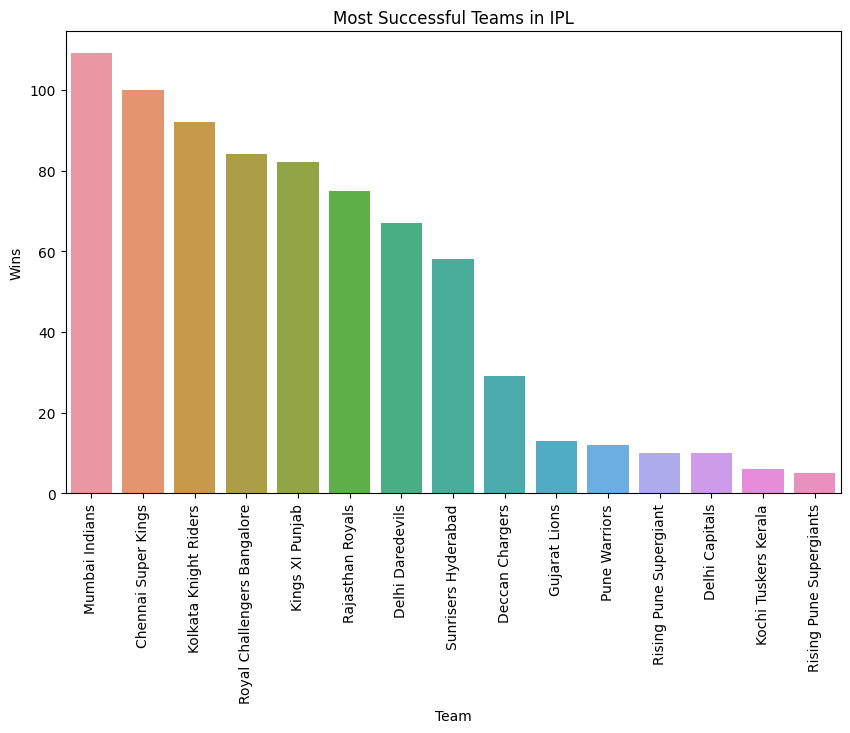

In [8]:
# Example 1: Bar chart for most successful teams
plt.figure(figsize=(10, 6))
sns.countplot(x='winner', data=matches_df, order=matches_df['winner'].value_counts().index)
plt.title("Most Successful Teams in IPL")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.xticks(rotation=90)
plt.show()


Derive Insights

In [7]:

# Most successful teams
most_successful_teams = matches_df['winner'].value_counts().idxmax()

# Top-performing players with the most "Player of the Match" awards
top_players = matches_df['player_of_match'].value_counts().idxmax()

# Factors contributing to wins or losses
factors_wins_losses = matches_df.groupby('winner')[['win_by_runs', 'win_by_wickets']].mean()

# Suggest teams or players for endorsement based on specific criteria (if required)
# Example: Suggest the top 5 players with the highest total runs
total_runs_by_player = deliveries_df.groupby('batsman')['batsman_runs'].sum()
top_players_for_endorsement = total_runs_by_player.nlargest(5)

# Example: Suggest the top 3 teams with the highest total runs
total_runs_by_team = deliveries_df.groupby('batting_team')['total_runs'].sum()
top_teams_for_endorsement = total_runs_by_team.nlargest(3)

# Display the results
print("\nMost Successful Teams:")
print(most_successful_teams)

print("\nTop Performing Players:")
print(top_players)

print("\nFactors Contributing to Wins or Losses:")
print(factors_wins_losses)

print("\nTop Players for Endorsement:")
print(top_players_for_endorsement)

print("\nTop Teams for Endorsement:")
print(top_teams_for_endorsement)


Most Successful Teams:
Mumbai Indians

Top Performing Players:
CH Gayle

Factors Contributing to Wins or Losses:
                             win_by_runs  win_by_wickets
winner                                                  
Chennai Super Kings            17.780000        2.890000
Deccan Chargers                14.517241        2.482759
Delhi Capitals                  9.200000        2.900000
Delhi Daredevils               10.074627        4.104478
Gujarat Lions                   0.076923        5.000000
Kings XI Punjab                11.280488        3.268293
Kochi Tuskers Kerala            3.833333        5.000000
Kolkata Knight Riders          11.804348        3.815217
Mumbai Indians                 17.119266        2.816514
Pune Warriors                  11.583333        3.000000
Rajasthan Royals               11.933333        3.640000
Rising Pune Supergiant         12.300000        3.100000
Rising Pune Supergiants        10.600000        4.000000
Royal Challengers Bangalore    